## Notes
### Non-Linear Relations in Data

- When changes in one variable make the change in another variable from same proportion, we say that there's **a linear relationship** between both variables.
- When changes in one variable make the change in another variable from different proportion, we say that there's **a non-linear relationshion.**

            (Linear relation between X and Y)
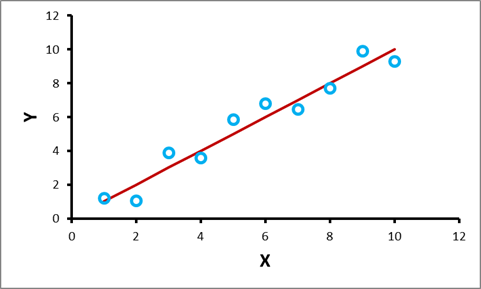


             (Non-linear relation between X and Y)


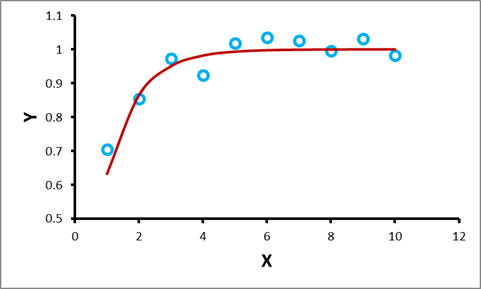

### Polynomial regression
- We know that the `linear regression model` fits the relationship between an independant variable (X) & and a dependant variable (y) if there's a linear relationship. (the model is with an equation = a + b1x + b2x)
- But in the case of non-linear relationship, we have a model that fits the the relationship with different equation, called **polynomial regression**  in the following way:
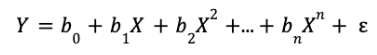
we have regression coefficients (b0, b1,..) multiplied by Xs with degrees (or order).
- Similar to simple and multiple linear regression models, polynomial regression models are also fitted using the method of least squares.
---

### Importing libs & data

1 - **Read the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2 - **Defining the input and output features**

In [2]:
data = pd.read_csv('data/Experience_Salaries.csv')

In [3]:
data.head()

,Designation,Experience,Salary
0,Sales Executive,1,50000
1,Office Asistant,2,55000
2,Software Engineer,3,85000
3,Sales Manager,4,100000
4,Assistant Manager,5,125000


In [4]:
data.shape

(10, 3)

In [7]:
data.value_counts()

Designation                Experience  Salary
Assistant Manager          5           125000    1
Director                   15          220000    1
HR Head                    7           120000    1
Marketing Head             12          120000    1
Office Asistant            2           55000     1
Sales Executive            1           50000     1
Sales Manager              4           100000    1
Senior Manager             10          140000    1
Software Engineer          3           85000     1
Technical Project Manager  9           135000    1
dtype: int64

In [11]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:,-1].values

In [12]:
# Checking the shape of input and output features
print('Shape of the input features:', X.shape)
print('Shape of the output features:', y.shape)


Shape of the input features: (10, 1)
Shape of the output features: (10,)


3 - **Defining and fitting the linear regression model**

In [13]:
# Defining and fitting a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)


LinearRegression()

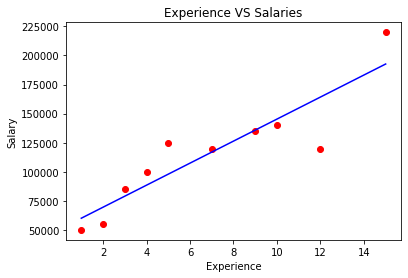

In [15]:
# Visualizing the fitted linear regression model
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')

plt.title('Experience VS Salaries')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

4 - **Defining and fitting the polynomial regression model**

In [59]:
# Defining and fitting a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree= 5)
x_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

In [60]:
lin_reg_2.predict(poly_reg.fit_transform(X))

array([ 46169.79101669,  64264.55731504,  82311.84468108,  99455.84801227,
       114524.93959062, 133827.07627799, 135006.09470064, 130372.73548655,
       124553.65486832, 219513.4580508 ])

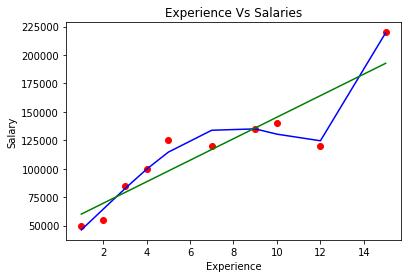

In [61]:
# Visualizing the fitted polynomial regression model

# plotting dataset
plt.scatter(X, y, color = 'red')

# predicted using poly model
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue') 

# predicted using linear reg model
plt.plot(X, lin_reg.predict(X), color='green') 
plt.title('Experience Vs Salaries')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()


Adjusting the curve for a better visualization

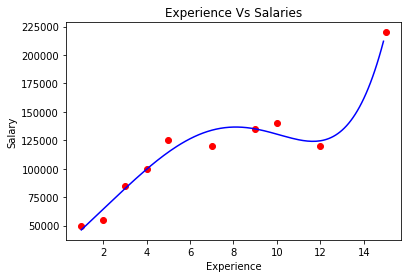

In [49]:
# Refined visualization
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Experience Vs Salaries')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()


In [47]:
pred_by_poly = lin_reg_2.predict(poly_reg.fit_transform(X))
pred_by_lin = lin_reg.predict(X)


In [48]:
preview = pd.DataFrame(data = {
    'polynomial reg model pred':pred_by_poly,
    'linear reg model pred':pred_by_lin
})
preview

,polynomial reg model pred,linear reg model pred
0,46169.791017,60057.411273
1,64264.557315,69530.271399
2,82311.844681,79003.131524
3,99455.848012,88475.991649
4,114524.939591,97948.851775
5,133827.076278,116894.572025
6,135006.094701,135840.292276
7,130372.735487,145313.152401
8,124553.654868,164258.872651
9,219513.458051,192677.453027


5 - **Making predictions with both the models**

In the end, let us check the predictions of salary by both the fitted models for an employee with 3.5 years of experience.

In [34]:
# Prediction using fitted linear regression model
lin_reg.predict([[3.5]])

array([83739.56158664])

In [35]:
# Prediction using fitted polynomial regression model
lin_reg_2.predict(poly_reg.fit_transform([[3.5]]))


array([91065.81257042])

**results**
- The linear regression model has predicted 83739.56 of salary for an employee with 3.5 years of experience. This is even less than the salary of an employee with 3 years of experience as per the original data. Whereas the polynomial regression model has predicted 91065.81 of salary for the same experience which looks more relevant as per the original data

- Now it is very clear that whenever a non-linear relationship exists between the dependent and independent variables, the polynomial regression model fits this relationship properly. 
